https://huggingface.co/datasets/dair-ai/emotion

# Installing Dataset

In [56]:
!pip install datasets

# Importing Necessary Libraries

In [5]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Data Preprocessing

In [7]:
data = load_dataset("dair-ai/emotion")

In [8]:
texts = data['train']['text']
labels = data['train']['label']

In [9]:
texts[0:6]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was']

In [13]:
# Define a dictionary for label-to-emotion mapping
label_map = {
    0: "Sadness",
    1: "Joy",
    2: "Love",
    3: "Anger",
    4: "Fear",
    5: "Surprise"
}

# Example: Mapping a few labels
example_labels = [0, 0, 3, 2, 3, 0]
mapped_labels = [label_map[label] for label in example_labels]

# Display the mapped labels
print("Mapped Labels:", mapped_labels)

Mapped Labels: ['Sadness', 'Sadness', 'Anger', 'Love', 'Anger', 'Sadness']


In [15]:
labels[0:6]

[0, 0, 3, 2, 3, 0]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [19]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# Naive Bayes Model

In [21]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_y_pred = nb_model.predict(X_test_vec)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")

Naive Bayes Accuracy: 0.62


In [23]:
nb_precision = precision_score(y_test, nb_y_pred, average='weighted', zero_division=0)
print(f"Naive Bayes Precision: {nb_precision:.2f}")

Naive Bayes Precision: 0.71


In [29]:
nb_f1 = f1_score(y_test, nb_y_pred, average='weighted', zero_division=0)
print(f"Naive Bayes F1 Score: {nb_f1:.2f}")

Naive Bayes F1 Score: 0.52


In [117]:
nb_recall = recall_score(y_test, nb_y_pred, average='weighted', zero_division=0)
print(f"Naive Bayes Recall: {nb_recall:.2f}")

Naive Bayes Recall: 0.62


# SVM Model

In [70]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_vec, y_train)
svm_y_pred = svm_model.predict(X_test_vec)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Accuracy: 0.88


In [71]:
svm_precision = precision_score(y_test, svm_y_pred, average='weighted', zero_division=0)
print(f"SVM Precision: {svm_precision:.2f}")

SVM Precision: 0.88


In [72]:
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted', zero_division=0)
print(f"SVM F1 Score: {svm_f1:.2f}")


SVM F1 Score: 0.88


In [101]:
svm_recall = recall_score(y_test, svm_y_pred, average='weighted', zero_division=0)
print(f"SVM Recall: {svm_recall:.2f}")

SVM Recall: 0.88


# Random Forest Model

In [73]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vec, y_train)
rf_y_pred = rf_model.predict(X_test_vec)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.85


In [78]:
rf_precision = precision_score(y_test, rf_y_pred, average='weighted', zero_division=0)
print(f"Random Forest Precision: {rf_precision:.2f}")


Random Forest Precision: 0.86


In [103]:
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted', zero_division=0)
print(f"Random Forest F1 Score: {rf_f1:.2f}")


Random Forest F1 Score: 0.85


In [105]:
rf_recall = recall_score(y_test, rf_y_pred, average='weighted', zero_division=0)
print(f"Random Forest Recall: {rf_recall:.2f}")

Random Forest Recall: 0.85


# Accuracy Comparison Bar Chart

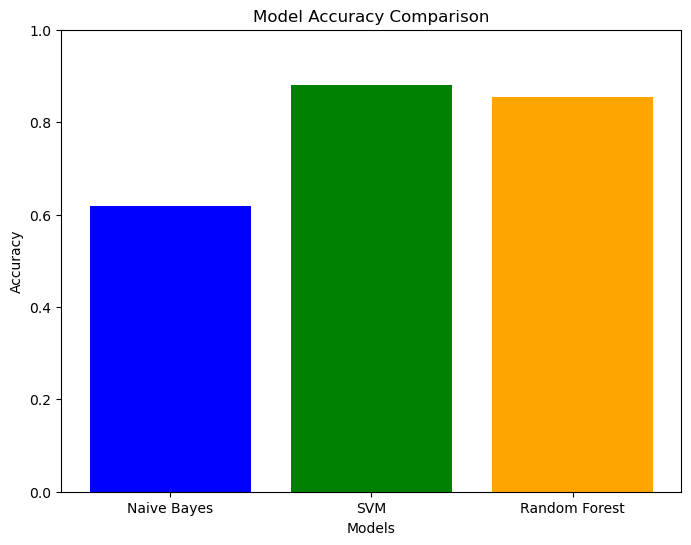

In [83]:
import matplotlib.pyplot as plt

accuracy_scores = {'Naive Bayes': nb_accuracy, 'SVM': svm_accuracy, 'Random Forest': rf_accuracy}


plt.figure(figsize=(8, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)  
plt.show()


# Precision Comparison Bar Chart

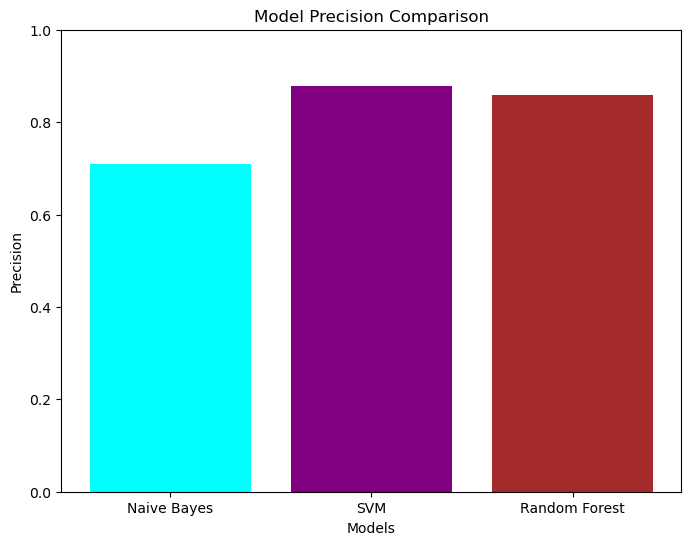

In [85]:
precision_scores = {'Naive Bayes': nb_precision, 'SVM': svm_precision, 'Random Forest': rf_precision}


plt.figure(figsize=(8, 6))
plt.bar(precision_scores.keys(), precision_scores.values(), color=['cyan', 'purple', 'brown'])
plt.title('Model Precision Comparison')
plt.ylabel('Precision')
plt.xlabel('Models')
plt.ylim(0, 1)  
plt.show()


# Recall Comparison Bar Chart

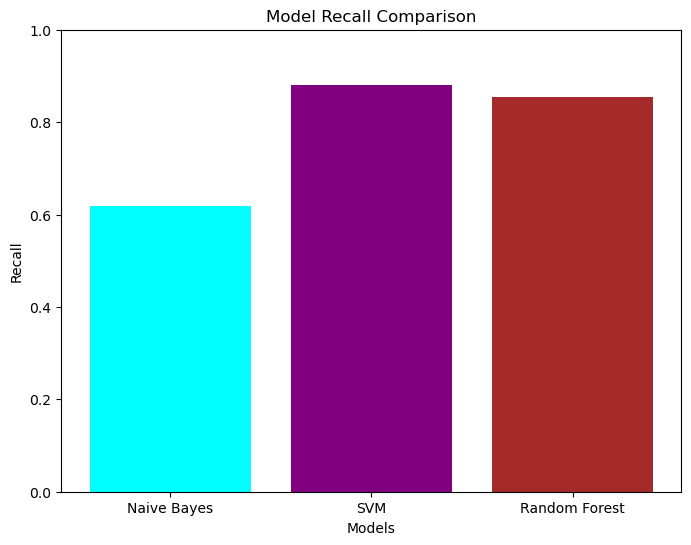

In [109]:
recall_scores = {
    'Naive Bayes': nb_recall,'SVM': svm_recall,'Random Forest': rf_recall 
}

plt.figure(figsize=(8, 6))
plt.bar(recall_scores.keys(), recall_scores.values(), color=['cyan', 'purple', 'brown'])
plt.title('Model Recall Comparison')
plt.ylabel('Recall')
plt.xlabel('Models')
plt.ylim(0, 1)  
plt.show()

# F1 Score Comparison Bar Chart

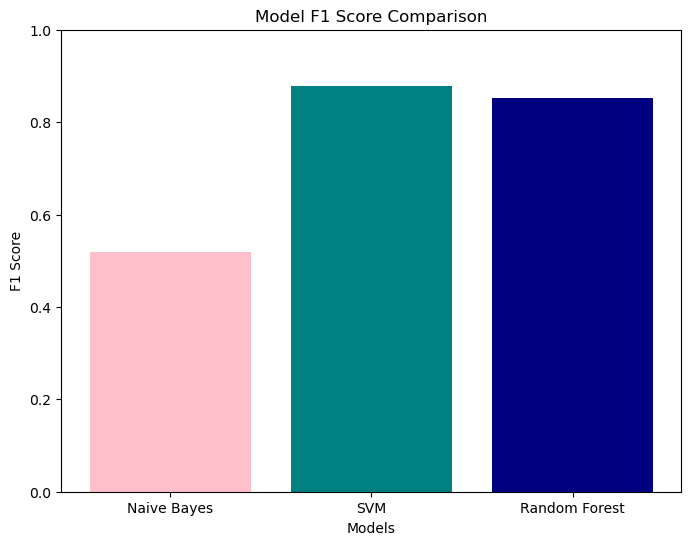

In [93]:
f1_scores = {'Naive Bayes': nb_f1, 'SVM': svm_f1, 'Random Forest': rf_f1}


plt.figure(figsize=(8, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['pink', 'teal', 'navy'])
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()
